In [1]:
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

import math 
import os 

In [2]:
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
sns.set(font='SimHei')

In [3]:
df= pd.read_csv('../dataset/min.csv')  # 读取股票文件

In [4]:
df.head()

,时间,开盘,收盘,最高,最低,成交量,成交额,最新价,code
0,2021-11-19 09:30:00,17.80,17.80,17.80,17.80,4127,7346060,17.80,1
1,2021-11-19 09:30:00,19.01,19.01,19.01,19.01,1718,3265918,19.01,2
2,2021-11-19 09:30:00,18.84,18.84,18.84,18.84,568,1070112,18.84,4
3,2021-11-19 09:30:00,4.12,4.12,4.12,4.12,29,11750,4.12,6
4,2021-11-19 09:30:00,2.14,2.14,2.14,2.14,165,35310,2.14,8


In [5]:
df = df.loc[df['code'] == 600031]
df.drop(['code'],axis=1,inplace=True)

In [6]:
df.set_index('时间',inplace=True)

In [7]:
df.head()

,开盘,收盘,最高,最低,成交量,成交额,最新价
时间,,,,,,,
2021-11-19 09:30:00,21.66,21.66,21.66,21.66,3208,6948528,21.660
2021-11-19 09:31:00,21.65,21.62,21.69,21.60,11702,25326434,21.647
2021-11-19 09:32:00,21.61,21.65,21.66,21.61,7952,17191749,21.637
2021-11-19 09:33:00,21.65,21.73,21.75,21.65,5002,10861705,21.651
2021-11-19 09:34:00,21.73,21.69,21.73,21.66,6512,14127838,21.659


# 添加特征

* 涨跌额

In [8]:
datalist = list()
for i in range(len(df)-1):
    datalist.append(df.iloc[i,1]-df.iloc[i+1,0])

In [9]:
df = df.iloc[:-1]
df.loc[:,'涨跌额'] = datalist

In [10]:
df.head()

,开盘,收盘,最高,最低,成交量,成交额,最新价,涨跌额
时间,,,,,,,,
2021-11-19 09:30:00,21.66,21.66,21.66,21.66,3208,6948528,21.660,0.01
2021-11-19 09:31:00,21.65,21.62,21.69,21.60,11702,25326434,21.647,0.01
2021-11-19 09:32:00,21.61,21.65,21.66,21.61,7952,17191749,21.637,0.00
2021-11-19 09:33:00,21.65,21.73,21.75,21.65,5002,10861705,21.651,0.00
2021-11-19 09:34:00,21.73,21.69,21.73,21.66,6512,14127838,21.659,0.00


* SVM支持向量机预测

In [40]:
df_for_svm = df.copy()

In [41]:
from sklearn import svm
model = svm.SVC(C=0.6, kernel='rbf', gamma=0.001)
# 添加一列涨跌数据
datalist = list()
datalist.append(1)
for i in range(1,len(df_for_svm)):
    if df_for_svm.iloc[i,0] > df_for_svm.iloc[i-1,1]:
        datalist.append(1)
    else:
        datalist.append(0)
df_for_svm.loc[:,'涨跌'] = datalist

In [42]:
df_for_svm.head()

,开盘,收盘,最高,最低,成交量,成交额,最新价,涨跌额,涨跌
时间,,,,,,,,,
2021-11-19 09:30:00,21.66,21.66,21.66,21.66,3208,6948528,21.660,0.01,1
2021-11-19 09:31:00,21.65,21.62,21.69,21.60,11702,25326434,21.647,0.01,0
2021-11-19 09:32:00,21.61,21.65,21.66,21.61,7952,17191749,21.637,0.00,0
2021-11-19 09:33:00,21.65,21.73,21.75,21.65,5002,10861705,21.651,0.00,0
2021-11-19 09:34:00,21.73,21.69,21.73,21.66,6512,14127838,21.659,0.00,0


In [ ]:
# 修改特征
for i in range(len(df_for_svm))

In [14]:
X_train = df_for_svm.iloc[:,:-1].values
y_train = df_for_svm.iloc[:,-1].values
model.fit(X_train[:-1], y_train[1:])

SVC(C=0.6, gamma=0.001)

In [15]:
X_train.shape,y_train.shape

((237, 8), (237,))

In [16]:
# 将数据按周期分割成多个组
datalist = list()
for i in range(len(df_for_svm)):
    X = df_for_svm.iloc[i,:-1].values
    Y = model.predict(X.reshape(1, len(X)))
    datalist.append(Y[0])
df_for_svm.loc[:,'svm预测'] = datalist

In [32]:
df_for_svm.head()

,开盘,收盘,最高,最低,成交量,成交额,最新价,涨跌额,涨跌,svm预测
时间,,,,,,,,,,
2021-11-19 09:30:00,21.66,21.66,21.66,21.66,3208,6948528,21.660,0.01,1,0
2021-11-19 09:31:00,21.65,21.62,21.69,21.60,11702,25326434,21.647,0.01,0,0
2021-11-19 09:32:00,21.61,21.65,21.66,21.61,7952,17191749,21.637,0.00,0,0
2021-11-19 09:33:00,21.65,21.73,21.75,21.65,5002,10861705,21.651,0.00,0,0
2021-11-19 09:34:00,21.73,21.69,21.73,21.66,6512,14127838,21.659,0.00,0,0


## 数据检查

In [18]:
# Function to check the missing percent of a DatFrame;
def check_missing_data(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False) * 100 /len(df),2)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

In [19]:
check_missing_data(df)

,Total,Percent
开盘,0,0.0
收盘,0,0.0
最高,0,0.0
最低,0,0.0
成交量,0,0.0
成交额,0,0.0
最新价,0,0.0
涨跌额,0,0.0


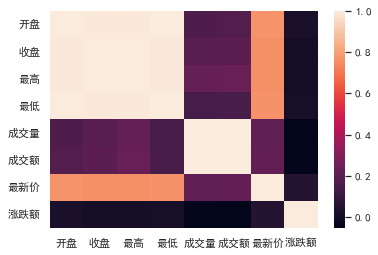

In [20]:
sns.heatmap(df.corr())
plt.show()

In [21]:
#获取DataFrame中的数据，形式为数组array形式
values=df.values
#确保所有数据为float类型
values=values.astype('float32')
 
# 特征的归一化处理
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
print(scaled)

[[0.44444275 0.44444275 0.40350723 ... 0.07797702 0.7880707  0.6       ]
 [0.4259262  0.37037277 0.45614243 ... 0.331144   0.7019806  0.6       ]
 [0.35185242 0.4259262  0.40350723 ... 0.2190837  0.63575745 0.40000004]
 ...
 [0.9259262  0.90740967 0.85964966 ... 0.16001847 0.98013306 0.40000004]
 [0.90740967 0.8888893  0.84210587 ... 0.196412   0.9867554  0.20000002]
 [0.90740967 0.9259262  0.87719345 ... 0.32232267 1.         0.40000004]]


In [22]:
# 定义series_to_supervised()函数
# 将时间序列转换为监督学习问题
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    """
    将时间序列框定为有监督的学习数据集。
        论据：
        数据：作为列表或NumPy数组的观察序列。
        n_in：作为输入的滞后观测数（X）。
        n_out：作为输出的观察数（y）。
        dropnan：布尔值，决定是否删除具有NaN值的行。
    返回：
    pd.DataFrame(用于监督学习)
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j + 1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j + 1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j + 1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [23]:
#将时间序列转换为监督学习问题
reframed = series_to_supervised(scaled, 1, 1)

In [24]:
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t)
1,0.444443,0.444443,0.403507,0.471695,0.078942,0.077977,0.788071,0.6,0.425926,0.370373,0.456142,0.358490,0.335752,0.331144,0.701981,0.6
2,0.425926,0.370373,0.456142,0.358490,0.335752,0.331144,0.701981,0.6,0.351852,0.425926,0.403507,0.377357,0.222373,0.219084,0.635757,0.4
3,0.351852,0.425926,0.403507,0.377357,0.222373,0.219084,0.635757,0.4,0.425926,0.574074,0.561401,0.452827,0.133182,0.131883,0.728470,0.4
4,0.425926,0.574074,0.561401,0.452827,0.133182,0.131883,0.728470,0.4,0.574074,0.500000,0.526314,0.471695,0.178836,0.176876,0.781464,0.4
5,0.574074,0.500000,0.526314,0.471695,0.178836,0.176876,0.781464,0.4,0.500000,0.462963,0.473686,0.452827,0.119788,0.118366,0.794693,0.8


In [25]:
# 删除不想预测的特征列，这里只预测收盘价
# 所以删除的是var1(t),var2(t),var3(t),
reframed.drop(['var1(t)','var2(t)','var3(t)','var4(t)','var5(t)','var6(t)'], axis=1, inplace=True)
# 打印数据的前5行
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var7(t),var8(t)
1,0.444443,0.444443,0.403507,0.471695,0.078942,0.077977,0.788071,0.6,0.701981,0.6
2,0.425926,0.370373,0.456142,0.358490,0.335752,0.331144,0.701981,0.6,0.635757,0.4
3,0.351852,0.425926,0.403507,0.377357,0.222373,0.219084,0.635757,0.4,0.728470,0.4
4,0.425926,0.574074,0.561401,0.452827,0.133182,0.131883,0.728470,0.4,0.781464,0.4
5,0.574074,0.500000,0.526314,0.471695,0.178836,0.176876,0.781464,0.4,0.794693,0.8


## 数据划分为训练集和测试集：

* 将处理后的数据集划分为训练集和测试集。这里按0.85比例划分，将训练集和测试集的最终输入（X）转换为为LSTM的输入格式，即[samples,timesteps,features]。

* Keras LSTM层的工作方式是通过接收3维（N，W，F）的数字阵列，其中N是训练序列的数目，W是序列长度，F是每个序列的特征数目。


In [26]:
# 划分训练集和测试集
train = reframed.iloc[:int(len(reframed)*0.85),:].values
test = reframed.iloc[int(len(reframed)*0.85):,:].values
# 划分训练集和测试集的输入和输出
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
#转化为三维数据
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape)
print(test_X.shape, test_y.shape)

(200, 1, 9) (200,)
(36, 1, 9) (36,)


# 模型构建及其预测

* 搭建LSTM模型并绘制损失图
    * 本实验使用keras深度学习框架对模型进行快速搭建。建立Sequential模型，向其中添加LSTM层，设定Dropout为0.5，加入Dense层将其维度聚合为1，激活函数使用relu（也用了sigmoid作为激活函数，但实验效果不如relu），损失函数定为均方差Mean Absolute Error(MAE)。优化算法采用Adam，模型采用50个epochs并且每个batch的大小为100。其中：隐藏层有64个神经元，输出层1个神经元（回归问题），输入变量是一个时间步（t-1）的特征。在fit()函数中设置validation_data参数，记录训练集和测试集的损失。

### 预测一次，并保存预测结构，用于之后的验证

In [27]:
checkpoint_save_path = "./checkpoint/test_4_1.ckpt"

In [28]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                                                 save_weights_only=True,
                                                 save_best_only=True,
                                                 monitor='val_loss')

* LSTM(neurons, input_shape=(input_timesteps, input_dim), return_sequences=return_seq)
* Dropout(dropout_rate)
* Dense(neurons, activation=activation)

In [29]:
train_X.shape[1], train_X.shape[2]

(1, 9)

Epoch 1/50
2/2 - 8s - loss: 0.4042 - val_loss: 0.3548 - 8s/epoch - 4s/step
Epoch 2/50
2/2 - 0s - loss: 0.3922 - val_loss: 0.3373 - 125ms/epoch - 63ms/step
Epoch 3/50
2/2 - 0s - loss: 0.3790 - val_loss: 0.3167 - 133ms/epoch - 67ms/step
Epoch 4/50
2/2 - 0s - loss: 0.3638 - val_loss: 0.2916 - 150ms/epoch - 75ms/step
Epoch 5/50
2/2 - 0s - loss: 0.3456 - val_loss: 0.2605 - 128ms/epoch - 64ms/step
Epoch 6/50
2/2 - 0s - loss: 0.3243 - val_loss: 0.2216 - 160ms/epoch - 80ms/step
Epoch 7/50
2/2 - 0s - loss: 0.2969 - val_loss: 0.1759 - 137ms/epoch - 69ms/step
Epoch 8/50
2/2 - 0s - loss: 0.2670 - val_loss: 0.1457 - 370ms/epoch - 185ms/step
Epoch 9/50
2/2 - 0s - loss: 0.2291 - val_loss: 0.1107 - 147ms/epoch - 73ms/step
Epoch 10/50
2/2 - 0s - loss: 0.1887 - val_loss: 0.1181 - 79ms/epoch - 40ms/step
Epoch 11/50
2/2 - 0s - loss: 0.1603 - val_loss: 0.2053 - 95ms/epoch - 48ms/step
Epoch 12/50
2/2 - 0s - loss: 0.1492 - val_loss: 0.3135 - 74ms/epoch - 37ms/step
Epoch 13/50
2/2 - 0s - loss: 0.1543 - val_lo

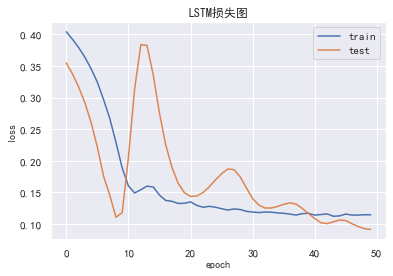

In [30]:
# 搭建LSTM模型
model = Sequential()

model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2]),return_sequences=True))

model.add(Dropout(0.2))

model.add(LSTM(100,return_sequences=True))
model.add(LSTM(100,return_sequences=False))

model.add(Dropout(0.2))

model.add(Dense(1,activation='relu'))

model.compile(loss='mae', optimizer='adam')

if os.path.exists(checkpoint_save_path + '.index'):
    print('-------------load the model-----------------')
    model.load_weights(checkpoint_save_path)
    
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=100, validation_data=(test_X, test_y), verbose=2,shuffle=False,
                    validation_freq=1,callbacks=[cp_callback])
 
# 绘制损失图
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('LSTM损失图', fontsize='12')
plt.ylabel('loss', fontsize='10')
plt.xlabel('epoch', fontsize='10')
plt.legend()
plt.show()

* 预测并反转数据（反归一化）
    * 需要将预测结果和测试集数据组合然后进行比例反转（invert the scaling），同时需要将测试集上的预期值也进行比例转换。 
         这里为什么进行比例反转（反归一化）呢？（因为我们将原始数据进行了预处理（连同输出值y），此时的误差损失计算是在处理之后的数据上进行的，为了计算在原始比例上的误差需要将数据进行转化。反转时的矩阵大小一定要和原来的大小（shape）完全相同，否则就会报错。）

In [31]:
#模型预测收益率
y_predict = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
 
# invert scaling for forecast
#将预测结果按比例反归一化
inv_y_test = np.concatenate((test_X[:, :6],y_predict), axis=1)
inv_y_test = scaler.inverse_transform(inv_y_test)
inv_y_predict=inv_y_test[:,-1]
 
# invert scaling for actual
#将真实结果按比例反归一化
test_y = test_y.reshape((len(test_y), 1))
inv_y_train = np.concatenate((test_X[:, :6],test_y), axis=1)
inv_y_train = scaler.inverse_transform(inv_y_train)
inv_y = inv_y_train[:, -1]

ValueError: operands could not be broadcast together with shapes (36,7) (8,) (36,7) 

In [ ]:
data = pd.DataFrame({"反归一化后的预测结果":inv_y_predict,'反归一化后的真实结果':inv_y})
data.head()

In [ ]:
plt.plot(inv_y,color='red',label='Original')
plt.plot(inv_y_predict,color='green',label='Predict')
plt.xlabel('the number of test data')
plt.ylabel('close')
plt.title('预测与实际数据图')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
# 评估
# calculate MSE 均方误差 ---> E[(预测值-真实值)^2] (预测值减真实值求平方后求均值)
mse = mean_squared_error(inv_y_predict, inv_y)
# calculate RMSE 均方根误差--->sqrt[MSE]    (对均方误差开方)
rmse = math.sqrt(mean_squared_error(inv_y_predict, inv_y))
# calculate MAE 平均绝对误差----->E[|预测值-真实值|](预测值减真实值求绝对值后求均值）
mae = mean_absolute_error(inv_y_predict, inv_y)
print('均方误差: %.6f' % mse)
print('均方根误差: %.6f' % rmse)
print('平均绝对误差: %.6f' % mae)

In [ ]:
#ACC
error = 0
summery = 0
for i in range(24):
    error += abs(inv_y_predict[i] - inv_y[i])
    summery += inv_y[i]
acc = 1 - error/summery
print("准确率：{}".format(acc))